# **Assignment: General Linear Regression**

In this assignment, you will perform kernel regression (general linear regression) on a given training data set. We will provide the skeleton code to help you through the procedure. Complete the code in the missing spaces shown below. Once you are done, run the last cell to plot your results.
# ***DO NOT change anything outside the indicated areas.*** <br>
(We will not grade your assignment based on the performance of your model. Instead we will check if you implemented the code correctly.)

In [1]:
from mpl_toolkits.mplot3d import Axes3D
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

import torch
import torch.nn as nn
print(f'PyTorch version: {torch.__version__}')
np.random.seed(0)
torch.manual_seed(0)
print("Done")

PyTorch version: 1.2.0
Done


We have generated 50 data points by adding Gaussian noise into the following function: <br>
$f(x_{1}, x_{2}) = a + b\cdot exp(x_{1}) + c\cdot sin(x_{}2) + d\cdot x_{1}x_{2}$, where $a, b, c, d\in \mathbf{R}$ and $x=[x_{1}, x_{2}]^{T}\in \mathbf{R}^{2}$ <br>
# **OBJECTIVE: find the original values of the scalars (a, b, c, d).**
(All four scalars were originally created using the formula np.random.uniform(-5, 5), that is, they are bounded in [-5, 5].)

In [2]:
X_data = np.array([[ 9.55979024e-01,  7.69917408e-02],       [ 2.24092732e-03, -8.55897733e-01],       [-4.63122040e-01, -2.34998349e-04],       [ 3.58459992e-01,  6.07478072e-01],       [-2.38117734e-01, -8.68127306e-01],       [-4.23708801e-01,  8.19187055e-01],       [-5.73229293e-01, -9.57520764e-02],       [ 8.62412039e-01, -9.50201545e-01],       [ 2.01097835e-01,  9.00259001e-01],       [-5.39394242e-01,  9.69798385e-02],       [ 8.18256750e-01, -7.33661108e-01],       [ 4.68251613e-02,  5.00819718e-01],       [ 3.38026482e-01, -6.44942805e-02],       [-5.90301819e-01, -1.84682218e-02],       [-2.55230621e-01, -4.51976903e-02],       [-2.68219228e-01,  6.75835989e-01],       [ 5.37295013e-01, -3.72010646e-01],       [ 1.45250665e-01, -4.47901903e-01],       [-9.43141349e-02, -2.94043268e-01],       [ 3.14798926e-01, -2.59297834e-01],       [-8.18140442e-02,  4.38648245e-01],       [-1.74016342e-01,  8.12846538e-01],       [-6.39096762e-01,  4.82237746e-01],       [-1.55251913e-01, -1.47092855e-01],       [ 2.68759737e-01,  4.58124021e-02],       [-1.70228043e-01, -9.97146239e-01],       [-8.15475308e-01,  4.18788787e-01],       [ 4.86911935e-02,  3.92320927e-01],       [ 9.10936646e-01,  3.65827709e-01],       [-8.93742619e-01, -3.82294630e-01],       [ 1.85189375e-01, -5.29759185e-01],       [ 9.29941999e-01,  8.90096448e-01],       [ 6.96801762e-01, -5.53520074e-02],       [ 6.82953430e-01, -7.37778715e-01],       [-3.82532685e-01, -7.40072117e-02],       [ 4.83694401e-01, -2.83495426e-02],       [-7.26247762e-01, -3.12926941e-01],       [-3.51147661e-01, -3.99162191e-01],       [-6.68997199e-01, -1.70196455e-01],       [-1.03758685e-01,  5.49800752e-01],       [ 5.92781402e-01,  4.47802560e-02],       [-7.87394077e-02,  5.56427203e-01],       [ 7.74577904e-01,  3.49837540e-01],       [ 6.00958098e-01,  8.78222707e-01],       [-9.18688381e-01,  7.51343450e-01],       [-4.46873855e-01, -4.84710012e-02],       [ 5.93521914e-01,  4.34484465e-01],       [-7.05704856e-01,  3.17496518e-01],       [-8.61495860e-01, -2.85858743e-01],       [ 6.25659100e-01, -1.44590334e-01]])
Y_data = np.array([[ 6.22063751],       [ 0.36820962],       [-1.37746567],       [ 1.25737619],       [-1.12338287],       [-3.7814721 ],       [-3.82475957],       [ 0.95209517],       [ 3.62767366],       [-1.04316065],       [ 0.49422937],       [-2.49071296],       [-2.04996054],       [-1.90124256],       [-1.23158231],       [-5.77287031],       [ 1.30341816],       [-2.01772604],       [ 1.40425478],       [-0.11287428],       [ 1.43605377],       [-3.56444959],       [-4.30990765],       [-1.09933642],       [ 1.53657901],       [ 0.15251726],       [-6.47914478],       [-1.12505413],       [ 3.29253909],       [-2.95656096],       [-2.07245363],       [ 7.72345787],       [ 0.54906812],       [-1.09884797],       [-0.94447352],       [ 0.55158372],       [-2.33706344],       [-0.15143156],       [-1.46710116],       [-1.43853105],       [ 2.78699858],       [-1.50561015],       [ 0.99700875],       [ 0.84924811],       [-6.12476908],       [-1.94879809],       [-1.00836708],       [-7.21261402],       [-2.15387403],       [-1.79035053]])
print(f'X_data: {X_data.shape} \t{type(X_data)}')
print(f'y_data: {Y_data.shape} \t{type(Y_data)}')
print("Done")

X_data: (50, 2) 	<class 'numpy.ndarray'>
y_data: (50, 1) 	<class 'numpy.ndarray'>
Done


1. We start by having a look at how the training data looks like. Set any number you want into the variables "angle1" and "angle2" to view the data from different perspectives.

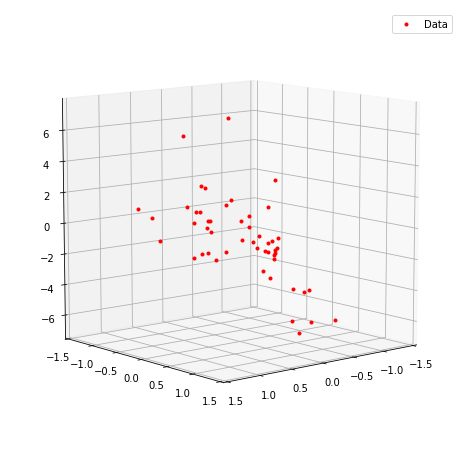

Done


In [3]:
def plot_train_data(X, y, angle1, angle2):
    assert X_data.shape == (50, 2)
    assert Y_data.shape == (50, 1)
    fig = plt.figure(figsize=(8, 8))
    ax = fig.gca(projection='3d')
    ax.plot3D(X_data[:, 0].flatten(), X_data[:, 1].flatten(), Y_data.flatten(), 'r.', label="Data")
    plt.legend()
    ax.set_xlim3d(-1.5, 1.5)
    ax.set_ylim3d(-1.5, 1.5)
    ax.view_init(angle1, angle2)
    plt.show()
    
############# COMPLETE THE CODE BELOW #############
angle1 = 10
angle2 = 50
###################################################
plot_train_data(X_data, Y_data, angle1, angle2)
print("Done")

## Step 0.5: Kernel Matrix

2. Define kernel matrix based on the function above

In [4]:
def kernelize(X):
    n = X.shape[0]
    out = np.zeros((n, 4))
    assert X.shape == (n, 2)
    
    ############# COMPLETE THE CODE BELOW #############
    out[:, 0] += 1
    out[:, 1] += np.exp(X[:, 0])
    out[:, 2] += np.sin(X[:, 1])
    out[:, 3] += X[:, 0] * X[:, 1]
    ###################################################
    
    return out
X_data_kernel = kernelize(X_data)
print(X_data_kernel.shape)
print("Done")

(50, 4)
Done


## Step 1: Numpy to PyTorch transformation

3. X_data and Y_data are based on the numpy array. Transform this into PyTorch tensor format <br>(Hint: Look at the class code "Linear Regression.ipynb")

In [5]:
############# COMPLETE THE CODE BELOW #############
X_data_tensor = torch.from_numpy(X_data_kernel.astype(np.float32))
Y_data_tensor = torch.from_numpy(Y_data.astype(np.float32))
###################################################

assert X_data_tensor.shape == (50, 4)
assert Y_data_tensor.shape == (50, 1)
print("Done")

Done


## Step 2: Create linear model

4. Specify number of dimensions for both input and output data. Also set linear model.<br>
Be aware that linear model of pytorch includes bias value.

In [6]:
############# COMPLETE THE CODE BELOW #############
input_size = 4
output_size = 1
model = nn.Linear(input_size, output_size)
###################################################
print(model.weight)
print(model.bias)
print("Done")

Parameter containing:
tensor([[-0.0037,  0.2682, -0.4115, -0.3680]], requires_grad=True)
Parameter containing:
tensor([-0.1926], requires_grad=True)
Done


## Step 3: Set loss and optimizing methods

5. Set parameters learning rate, loss method, and optimizer. <br>
Hint: Your learning rate should be set low enough that your algorithm shows convergence.

In [7]:
############# COMPLETE THE CODE BELOW #############
learning_rate = 0.01
loss_method = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=learning_rate)
###################################################
print("Done")

Done


## Step 4: Train the model

6. Write code forward pass, loss, backward pass, update parameters


In [8]:
# Set the number of epochs
num_epochs = 3000

for epoch in range(num_epochs):
    
    ############# COMPLETE THE CODE BELOW #############
    # Compute forward pass
    Y_pred_tensor = model(X_data_tensor)
    
    # Compute loss
    loss = loss_method(Y_pred_tensor, Y_data_tensor)
    
    # Compute backward pass
    loss.backward()
    
    # Update parameters
    optimizer.step()
    optimizer.zero_grad()
    ###################################################
    
    # Print progress
    if (epoch + 1) % 300 == 0:
        print(f'Epoch: {epoch+1}\tLoss = {loss.item():.5f}')
print("Done")

Epoch: 300	Loss = 3.36513
Epoch: 600	Loss = 2.78317
Epoch: 900	Loss = 2.63103
Epoch: 1200	Loss = 2.57317
Epoch: 1500	Loss = 2.54934
Epoch: 1800	Loss = 2.53941
Epoch: 2100	Loss = 2.53526
Epoch: 2400	Loss = 2.53352
Epoch: 2700	Loss = 2.53280
Epoch: 3000	Loss = 2.53249
Done


## Step 5: Plot the results

7. Extract weight values from model

In [9]:
_, weight_dims = X_data_kernel.shape
weight = []
############# COMPLETE THE CODE BELOW #############
for i in range(weight_dims):
    weight.append(model.weight[0, i].item())
###################################################
weight = np.array(weight)
assert weight.shape == (4, )
print(weight)
print("Done")

[-2.01860571  2.96042562 -0.73847699  4.25487328]
Done


## Step 6: Check your result

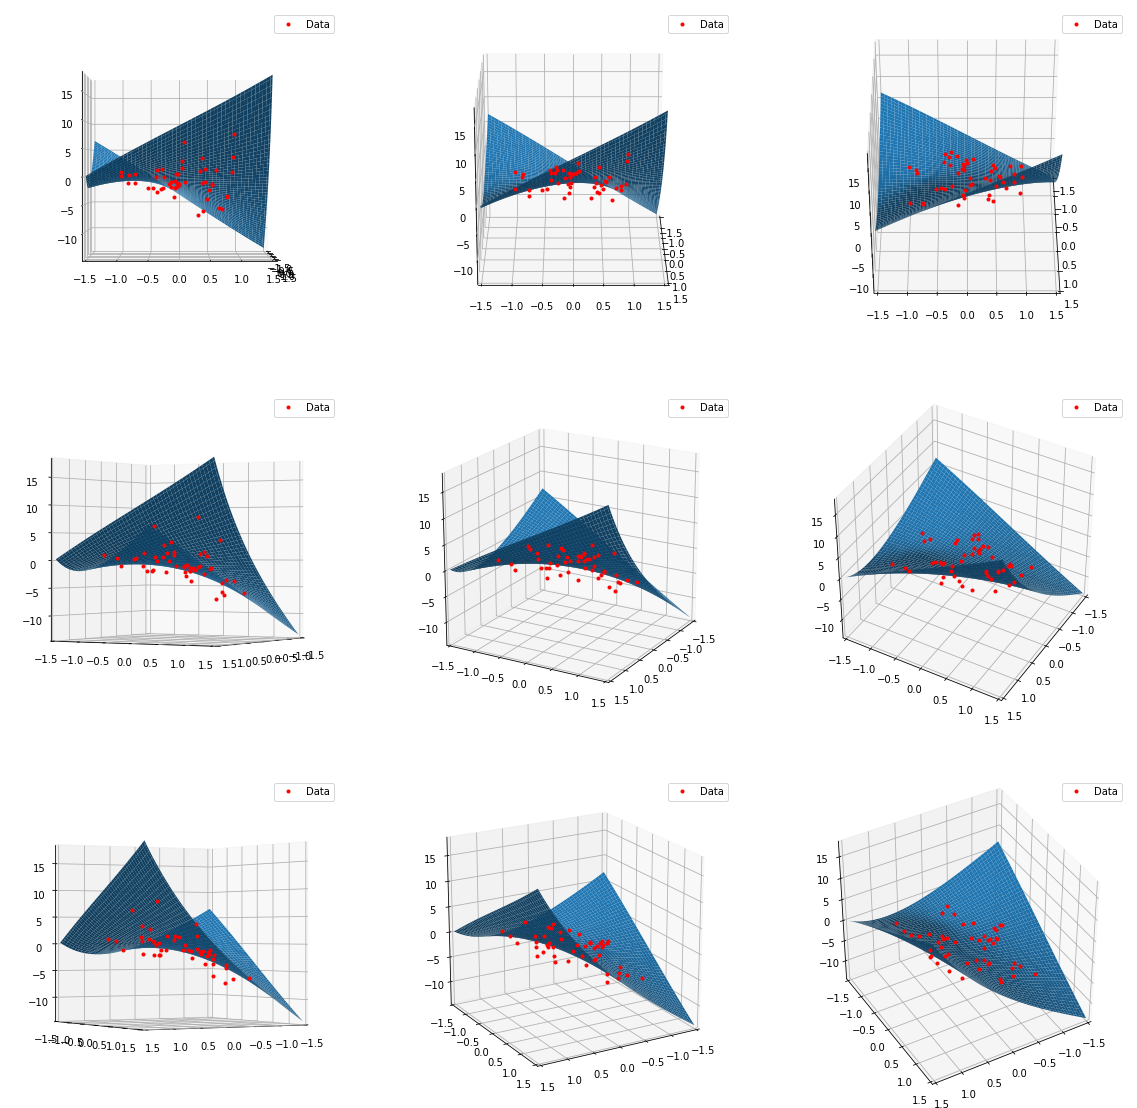

In [10]:
def plot_3D(X, y, w, x_low=-1.5, x_high=1.5):
    '''
    Plot the surface of the ground truth function and the points of the training data.
    The surface function is given by f(x) = a + b*exp(x1) + c*sin(x2) + d*x1*x2
    '''
    # Check if parameters and dataset have the correct conditions
    n = len(y)
    assert weight.shape == (4, )
    assert X.shape == (n, 2)
    assert y.shape == (n, 1)
    
    # Create surface points
    x1 = np.linspace(x_low, x_high, 100).reshape(-1, 1)
    x2 = np.linspace(x_low, x_high, 100).reshape(-1, 1)
    X2, X1 = np.meshgrid(x1,x2)
    X_true = kernelize(np.concatenate([np.reshape(X1,[-1,1]), np.reshape(X2,[-1,1])], axis=1))
    Y_true = np.zeros((100, 100))
    X_true_tensor = torch.from_numpy(X_true.astype(np.float32))
    Y_predict = model(X_true_tensor)
    k = 0
    for i in range(100):
        for j in range(100):
            Y_true[i, j] += Y_predict[k].item()
            k += 1
    
    # Create data points
    X_data = X.copy()
    Y_data = y.copy()
    x1_data = X_data[:, 0]
    x2_data = X_data[:, 1]
    
    # Plot
    fig = plt.figure(figsize=(20, 20))
    for i in range(9):
        ax = fig.add_subplot(3, 3, i+1, projection='3d')
        ax.plot_surface(X1, X2, Y_true)
        ax.plot3D(x1_data.flatten(), x2_data.flatten(), Y_data.flatten(), 'r.', label="Data")
        plt.legend()
        ax.set_xlim3d(x_low, x_high)
        ax.set_ylim3d(x_low, x_high)
        ax.view_init((i%3)*20, (i//3)*30)
    plt.show()
  
plot_3D(X_data, Y_data, weight)